<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_runtime_sample_01_mkbahk_20241007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.1.0

## Qiskit 설치: Mac 또는 Linux ###
#%pip install 'qiskit[visualization]'==1.1.0

In [2]:
### 다른 패키지들도 설치해봅시다
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.9 MB/s eta 0:00:00


In [3]:
### Qiskit 버전을 확인합니다
import qiskit
qiskit.__version__

'1.1.0'

In [4]:
### 다른 패키지들의 버전을 확인합니다
%pip show qiskit qiskit-ibm-runtime qiskit_aer qiskit-transpiler-service pylatexenc matplotlib

Name: qiskit
Version: 1.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-aer
Version: 0.15.1

In [29]:
### 불러오기
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp, Statevector # Add import for Statevector
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
import matplotlib.pyplot as plt

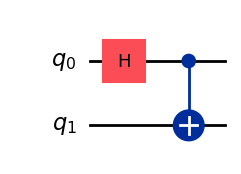

In [74]:
qubits  = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits

circuit.h(q0)
circuit.cx(q0, q1)
#circuit.measure_all()

circuit.draw("mpl")

In [75]:
# Run the sampler job locally using FakeBrisbaneV2
fake_statvector = AerSimulator(method='statevector')

# To save statevector manually (optional)
circuit.save_statevector()
job = fake_statvector.run(circuit)

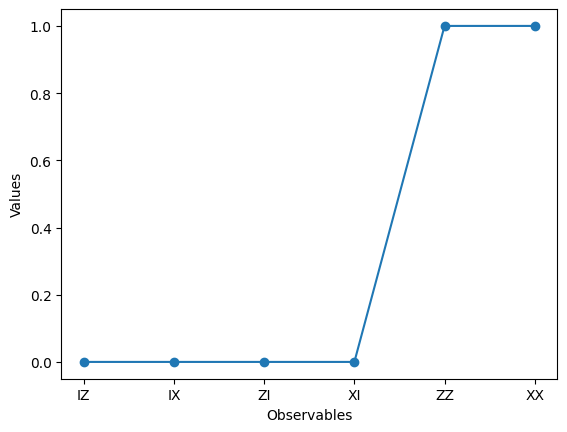

In [76]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
observables = [SparsePauliOp(obs) for obs in data] # Define observables
# Get the statevector from the result
statevector = job.result().get_statevector()

# Calculate expectation values for each observable
values = [Statevector(statevector).expectation_value(obs) for obs in observables]

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

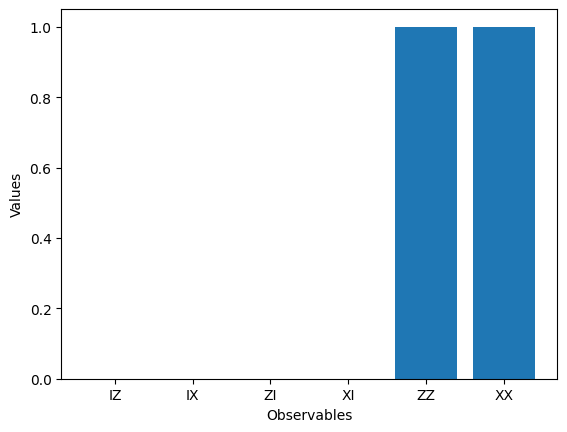

In [77]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()

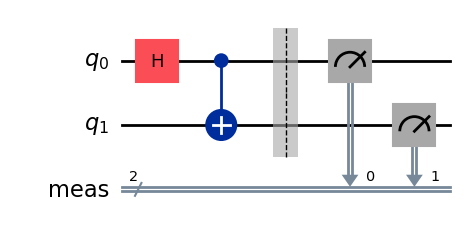

In [86]:
qubits  = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits

circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

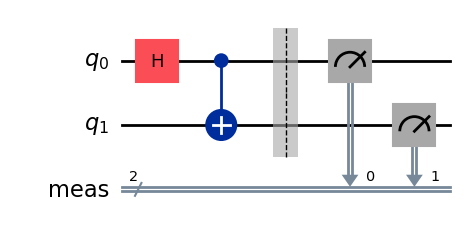

In [87]:
# Run the sampler job locally using FakeBrisbaneV2
fake_brisbane = AerSimulator(method='automatic', device='FakeBrisbaneV2') # Use AerSimulator with device argumentpass_manager = generate_preset_pass_manager(optimization_level=3, backend=fake_brisbane)
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=fake_brisbane)
isa_circuit = pass_manager.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [95]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [81]:
# Estimator를 설정합니다
estimator = Estimator(AerSimulator())
#estimator = Estimator(backend)
# Estimator로 회로를 실행합니다

# Apply the layout of the transpiled circuit to the observables
observables_isa = [observable.apply_layout(isa_circuit.layout) for observable in observables]

pub = (isa_circuit, observables_isa) # Use the transpiled observables

job = estimator.run(pubs=[pub])

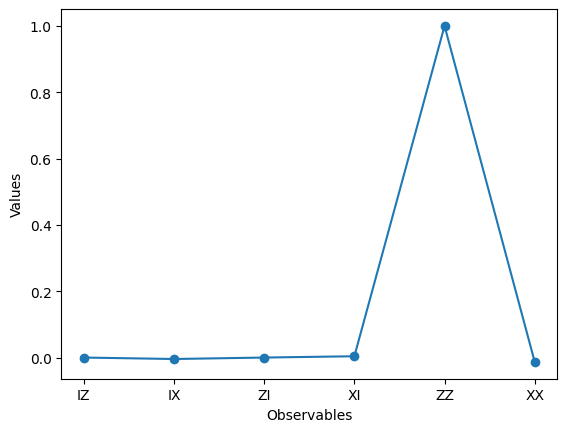

In [96]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

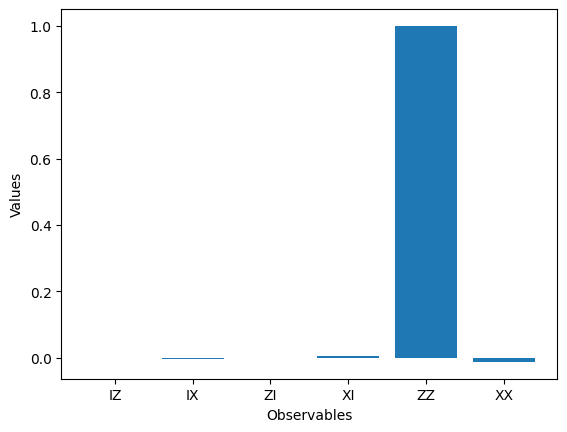

In [97]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()

In [ ]:
qubits  = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits

circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

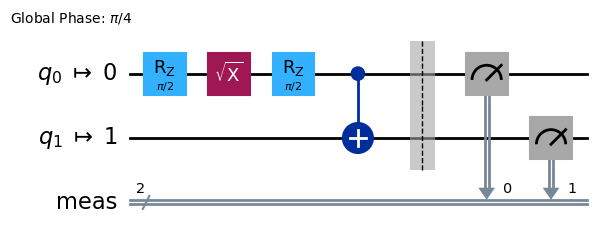

In [102]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2 # Import FakeManilaV2
# Run the sampler job locally using FakeBrisbaneV2
fake_manila = FakeManilaV2()
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=fake_manila)
isa_circuit = pass_manager.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [103]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [104]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2 # Import FakeManilaV2
# Run the sampler job locally using FakeBrisbaneV2
fake_manila = FakeManilaV2()

estimator = Estimator(fake_manila)
# Estimator로 회로를 실행합니다

# Apply the layout of the transpiled circuit to the observables
observables_isa = [observable.apply_layout(isa_circuit.layout) for observable in observables]

pub = (isa_circuit, observables_isa) # Use the transpiled observables

job = estimator.run(pubs=[pub])

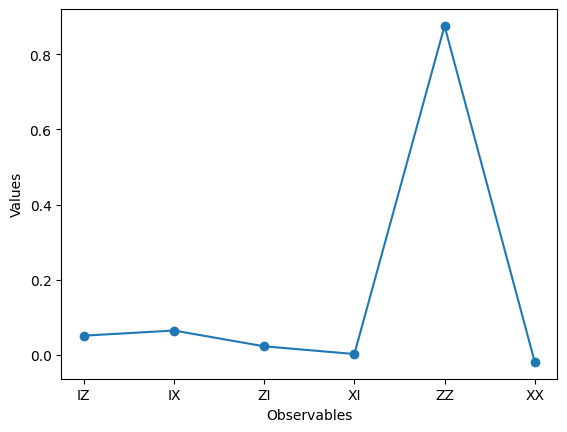

In [108]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

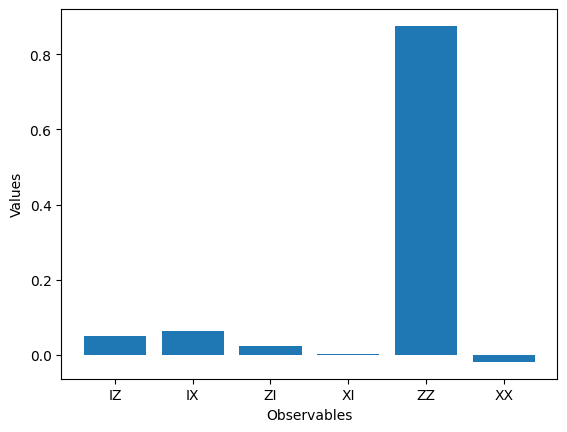

In [106]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()

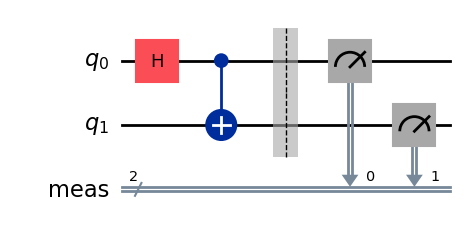

In [92]:
qubits  = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits

circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

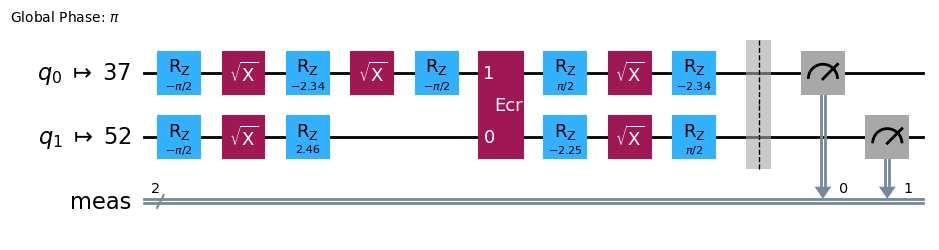

In [98]:
service = QiskitRuntimeService(channel="ibm_quantum", token="16d422f9c8fd7a34c34fa04292a3b27a4ebe822dd653724757d34fb7737a6e80f652b48092bb9dcfe2d295c3573298b01b8d95ea9693d33e106bb30591e77817")
backend = service.backend('ibm_brisbane')
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pass_manager.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [61]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [62]:
# Estimator를 설정합니다
#estimator = Estimator(AerSimulator())
estimator = Estimator(backend)
# Estimator로 회로를 실행합니다

# Apply the layout of the transpiled circuit to the observables
observables_isa = [observable.apply_layout(isa_circuit.layout) for observable in observables]

pub = (isa_circuit, observables_isa) # Use the transpiled observables

job = estimator.run(pubs=[pub])

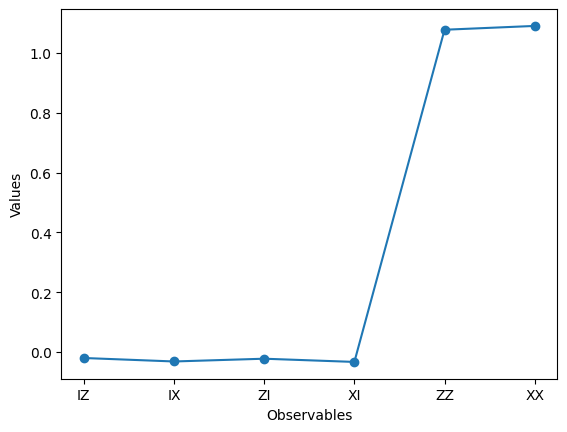

In [63]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

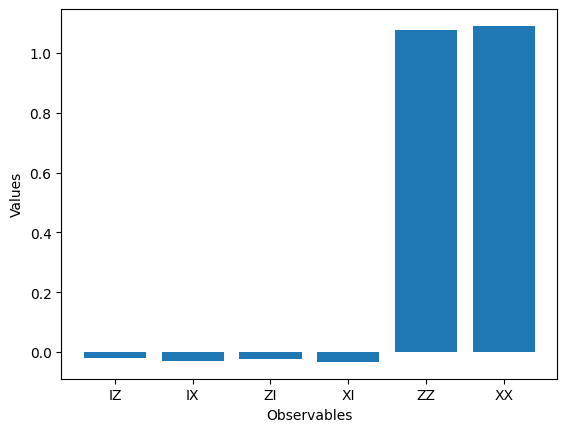

In [64]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()